In [32]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [199]:
# b <- read.table('../Data/seoul_business.txt' ,header = T, sep = '')
# s <- read.csv('../Data/seoul_sgbs.csv' )
# b <- subset(b, b$동 != '합계' & b$동 != '소계')
# rownames(b) <-c()
# head(b)
# tail(b) # 423 둔촌1동 빼고  ,  여의도동으로 표기되어있음 여의동으로 바꾸기


s <- subset(s, 행정동 != '둔촌1동')
head(s) # 종로5·6가동이 없음 -> 종로5.6가동 으로 표기되어있음 , 여의동으로 되어있음 , 둔촌1동 있음 
tail(s) # 423개
# subset(s , s$행정동 %in% '')
# ifelse(행정동 %in% 동 , 0, as.character(행정동))


,년도,분기,행정동,운영평균,폐업평균,서울운영평균,서울시폐업평균
1,2019,4,둔촌2동,111,49,110,54
3,2019,4,길동,103,47,110,54
4,2019,4,성내3동,110,47,110,54
5,2019,4,성내2동,104,48,110,54
6,2019,4,성내1동,107,51,110,54
7,2019,4,천호3동,108,49,110,54


,년도,분기,행정동,운영평균,폐업평균,서울운영평균,서울시폐업평균
10428,2014,1,무악동,97,53,91,44
10429,2014,1,평창동,95,50,91,44
10430,2014,1,부암동,90,47,91,44
10431,2014,1,삼청동,77,48,91,44
10432,2014,1,사직동,103,50,91,44
10433,2014,1,청운효자동,90,53,91,44


In [174]:
#자치구명 
자치구명 <- c(rep('강동구',17) , rep('송파구',27) , rep('강남구',22) , rep('서초구',18) , rep('관악구',21) , rep('동작구',15) , rep('영등포구',18) , rep('금천구',10) , rep('구로구',15) , rep('강서구',20) , rep('양천구',18) , 
rep('마포구',16) , rep('서대문구',14) , rep('은평구',16) , rep('노원구',19) , rep('도봉구',14) , rep('강북구',13) , rep('성북구',20) , rep('중랑구',16) , rep('동대문구',14) , rep('광진구',15) , 
rep('성동구',17) , rep('용산구',16) , rep('중구',15) , rep('종로구',17))
자치구명 <- as.character(rep(자치구명,4))
#자치구행정동명 <- paste(자치구명, s19$행정동)


In [211]:
final <- data.frame()

In [209]:
s19 <- subset(s , s$년도 == 2019)
s19 <- subset(s19 , s19$서울운영평균 == 110 | s19$서울운영평균 == 109 |s19$서울운영평균 == 108 |s19$서울운영평균 == 107 )
s19 <- data.frame(s19[,1:2] , 자치구행정동명 , s19[,4:7])
s19 <- aggregate( . ~ 자치구행정동명, s19 , mean)
s19 <- s19[,-3]

s18 <- subset(s , s$년도 == 2018)
#s18 <- subset(s18 , s18$서울운영평균 == 102 | s18$서울운영평균 == 109 |s18$서울운영평균 == 108 |s18$서울운영평균 == 107 )
s18 <- data.frame(s18[,1:2] , 자치구행정동명 , s18[,4:7])
s18 <- aggregate( . ~ 자치구행정동명, s18 , mean)
s18 <- s18[,-3]

s17 <- subset(s , s$년도 == 2017)
#s17 <- subset(s17 , s17$서울운영평균 == 110 | s17$서울운영평균 == 109 |s17$서울운영평균 == 108 |s17$서울운영평균 == 107 )
s17 <- data.frame(s17[,1:2] , 자치구행정동명 , s17[,4:7])
s17 <- aggregate( . ~ 자치구행정동명, s17 , mean)
s17 <- s17[,-3]

s16 <- subset(s , s$년도 == 2016)
#s16 <- subset(s16 , s16$서울운영평균 == 110 | s16$서울운영평균 == 109 |s16$서울운영평균 == 108 |s16$서울운영평균 == 107 )
s16 <- data.frame(s16[,1:2] , 자치구행정동명 , s16[,4:7])
s16 <- aggregate( . ~ 자치구행정동명, s16 , mean)
s16 <- s16[,-3]

s15 <- subset(s , s$년도 == 2015)
#s15 <- subset(s15 , s15$서울운영평균 == 110 | s15$서울운영평균 == 109 |s15$서울운영평균 == 108 |s15$서울운영평균 == 107 )
s15 <- data.frame(s15[,1:2] , 자치구행정동명 , s15[,4:7])
s15 <- aggregate( . ~ 자치구행정동명, s15 , mean)
s15 <- s15[,-3]



In [216]:
final <- rbind(s15,s16,s17,s18,s19)
summary(final)
str(final)
head(final)
tail(final)

        자치구행정동명      년도         운영평균         폐업평균     
 강남구 개포1동:   5   Min.   :2015   Min.   : 18.75   Min.   : 27.25  
 강남구 개포2동:   5   1st Qu.:2016   1st Qu.: 91.50   1st Qu.: 47.00  
 강남구 개포4동:   5   Median :2017   Median : 98.75   Median : 49.75  
 강남구 논현1동:   5   Mean   :2017   Mean   : 99.53   Mean   : 50.48  
 강남구 논현2동:   5   3rd Qu.:2018   3rd Qu.:106.75   3rd Qu.: 53.00  
 강남구 대치1동:   5   Max.   :2019   Max.   :170.00   Max.   :147.00  
 (Other)       :2085                                                   
  서울운영평균    서울시폐업평균 
 Min.   : 94.75   Min.   :47.00  
 1st Qu.: 95.75   1st Qu.:48.50  
 Median : 97.25   Median :49.75  
 Mean   : 99.40   Mean   :49.85  
 3rd Qu.:100.75   3rd Qu.:50.75  
 Max.   :108.50   Max.   :53.25  
                                 

'data.frame':	2115 obs. of  6 variables:
 $ 자치구행정동명: Factor w/ 423 levels "강남구 개포1동",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 년도          : num  2015 2015 2015 2015 2015 ...
 $ 운영평균      : num  102 99 98.5 86 87.5 ...
 $ 폐업평균      : num  48.5 48.5 43 43 43.2 ...
 $ 서울운영평균  : num  94.8 94.8 94.8 94.8 94.8 ...
 $ 서울시폐업평균: num  47 47 47 47 47 47 47 47 47 47 ...


자치구행정동명,년도,운영평균,폐업평균,서울운영평균,서울시폐업평균
강남구 개포1동,2015,102.0,48.50,94.75,47
강남구 개포2동,2015,99.0,48.50,94.75,47
강남구 개포4동,2015,98.5,43.00,94.75,47
강남구 논현1동,2015,86.0,43.00,94.75,47
강남구 논현2동,2015,87.5,43.25,94.75,47
강남구 대치1동,2015,93.0,47.25,94.75,47


,자치구행정동명,년도,운영평균,폐업평균,서울운영평균,서울시폐업평균
2110,중랑구 상봉1동,2019,89.75,49.25,108.5,53.25
2111,중랑구 상봉2동,2019,107.25,50.75,108.5,53.25
2112,중랑구 신내1동,2019,97.00,50.00,108.5,53.25
2113,중랑구 신내2동,2019,100.25,49.00,108.5,53.25
2114,중랑구 중화1동,2019,107.00,51.50,108.5,53.25
2115,중랑구 중화2동,2019,112.00,50.25,108.5,53.25


In [222]:
#write.csv(final, "../Data/seoul_analysis.csv", row.names=F)

In [226]:
a <- read.table("../Data/2015-2019_business_worker.txt" , header =T , sep='' )
colnames(a)

[1] "년도"                                          
 [2] "자치구명"                                      
 [3] "동"                                            
 [4] "사업체수"                                      
 [5] "총종사자수"                                    
 [6] "총여성종사자수"                                
 [7] "농업.임업.및.어업"                             
 [8] "농업.임업.및.어업.여성."                       
 [9] "광업"                                          
[10] "광업.여성."                                    
[11] "제조업"                                        
[12] "제조업.여성."                                  
[13] "전기.가스.증기.및.공기조절.공급업"             
[14] "전기.가스.증기.및.공기조절.공급업.여성."       
[15] "수도.하수.및.폐기물.처리.원료.재생업"          
[16] "수도.하수.및.폐기물.처리.원료.재생업.여성."    
[17] "건설업"                                        
[18] "건설업.여성."                                  
[19] "도매.및.소매업"                                
[20] "도매.및.소매업.여성."                          
[21] "운수.및.창고업"                                
[22] "운수.및.창고업.여성."                          
[23] "숙박.및.음식점업"                              
[24] "숙박.및.음식점업.여성."                        
[25] "정보통신업"                                    
[26] "정보통신업.여성."                              
[27] "금융.및.보험업"                                
[28] "금융.및.보험업.여성."                          
[29] "부동산업"                                      
[30] "부동산업.여성."                                
[31] "전문.과학.및.기술.서비스업"                    
[32] "전문.과학.및.기술.서비스업.여성."              
[33] "사업시설.관리.사업.지원.및.임대.서비스업"      
[34] "사업시설.관리.사업.지원.및.임대.서비스업.여성."
[35] "공공행정.국방.및.사회보장.행정"                
[36] "공공행정.국방.및.사회보장.행정.여성."          
[37] "교육.서비스업"                                 
[38] "교육.서비스업.여성."                           
[39] "보건업.및.사회복지.서비스업"                   
[40] "보건업.및.사회복지.서비스업.여성."             
[41] "예술.스포츠.및.여가관련.서비스업"              
[42] "예술.스포츠.및.여가관련.서비스업.여성."        
[43] "협회.및.단체.수리.및.기타.개인.서비스업"       
[44] "협회.및.단체.수리.및.기타.개인.서비스업.여성."

---

In [94]:
# 최종으로 만들 데이터
seoul <- read.csv("../Data/cafe_seoul_analysis.csv")
seoul <- seoul[,-1]
# 데이터 정제 필요
data <- read.csv("../Data/cafe_data.csv")
data <- data[,-1]

In [114]:
#seoul$음료점 <- as.numeric(seoul$음료점)
colnames(data) <- c('년도','동','한식','용달운송','부동산','의류점','술집','미용','슈퍼마켓','분식','카페','세탁소','노래방','편의점','치킨','자동차수리','야채가게','정육점','중국집','당구장','제과점','PC방')
colnames(data) 
str(seoul)
# str(data)
data <- arrange(data, 년도 , 동)
head(data[,1:20])
head(seoul)

[1] "년도"       "동"         "한식"       "용달운송"   "부동산"    
 [6] "의류점"     "술집"       "미용"       "슈퍼마켓"   "분식"      
[11] "카페"       "세탁소"     "노래방"     "편의점"     "치킨"      
[16] "자동차수리" "야채가게"   "정육점"     "중국집"     "당구장"    
[21] "제과점"     "PC방"

'data.frame':	2115 obs. of  11 variables:
 $ 기간          : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ 자치구        : Factor w/ 25 levels "강남구","강동구",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 동            : Factor w/ 424 levels "가락1동","가락2동",..: 16 17 18 59 60 72 73 74 77 78 ...
 $ 음료점        : int  4 14 31 103 128 25 87 102 42 40 ...
 $ 사업체수      : int  490 902 2403 5770 5731 1013 3579 3756 1656 1970 ...
 $ 총종사자수    : int  1694 3466 12402 43779 65282 7103 51945 29049 19542 22083 ...
 $ 총여성종사자수: int  582 1988 4077 20314 27341 3974 21308 12176 8015 8674 ...
 $ 운영평균      : num  102 99 98.5 86 87.5 ...
 $ 폐업평균      : num  48.5 48.5 43 43 43.2 ...
 $ 서울운영평균  : num  94.8 94.8 94.8 94.8 94.8 ...
 $ 서울시폐업평균: num  47 47 47 47 47 47 47 47 47 47 ...


년도,동,한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,분식,카페,세탁소,노래방,편의점,치킨,자동차수리,야채가게,정육점,중국집,당구장
2015,강남구 개포1동,13,38,42,9,0,20,14,5,4,11,0,1,1,1,5,1,2,0
2015,강남구 개포2동,56,23,51,14,20,33,14,16,14,15,7,8,11,4,4,4,2,4
2015,강남구 개포4동,101,42,53,26,19,32,9,22,31,18,13,18,15,25,3,5,8,9
2015,강남구 논현1동,318,18,193,100,102,98,35,32,103,40,34,53,23,10,11,16,18,14
2015,강남구 논현2동,350,5,139,79,102,68,33,58,128,30,16,53,18,16,1,6,28,15
2015,강남구 대치1동,46,2,67,13,7,29,8,19,25,12,5,11,8,1,4,7,3,2


기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47
2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47
2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47
2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47
2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47
2015,강남구,대치1동,25,1013,7103,3974,93.0,47.25,94.75,47


In [91]:
ran <- c(seq(0,50,3),seq(51,120,5),seq(121,290,10))
table(cut(seoul$음료점, breaks= ran,right = F))
# sort(seoul$음료점)


    [0,3)     [3,6)     [6,9)    [9,12)   [12,15)   [15,18)   [18,21)   [21,24) 
       13        73       125       159       165       153       149       131 
  [24,27)   [27,30)   [30,33)   [33,36)   [36,39)   [39,42)   [42,45)   [45,48) 
      116       104        83        71        68        65        60        60 
  [48,51)   [51,56)   [56,61)   [61,66)   [66,71)   [71,76)   [76,81)   [81,86) 
       57        64        41        44        29        30        22        20 
  [86,91)   [91,96)  [96,101) [101,106) [106,111) [111,116) [116,121) [121,131) 
       33        18        18        22        14        18         7        14 
[131,141) [141,151) [151,161) [161,171) [171,181) [181,191) [191,201) [201,211) 
        9        12         6         4         4         1         1         0 
[211,221) [221,231) [231,241) [241,251) [251,261) [261,271) [271,281) 
        1         2         2         2         5         1         2 

In [113]:
#  부호검정
x <- subset(seoul , seoul$기간 == 2015)[,4]
y <- subset(seoul , seoul$기간 == 2016)[,4]
binom.test(c(length(x[x>y]),length(x[x<y])))
length(x[x>y])
length(x[x<y])
# p-value < 2.2e-16 ---> 대립가설 : 유의한 차이가 있다.

#  부호검정
x <- subset(seoul , seoul$기간 == 2016)[,4]
y <- subset(seoul , seoul$기간 == 2017)[,4]
binom.test(c(length(x[x>y]),length(x[x<y])))

# p-value = 3.55e-05 ---> 대립가설 : 유의한 차이가 있다.

#  부호검정
x <- subset(seoul , seoul$기간 == 2017)[,4]
y <- subset(seoul , seoul$기간 == 2018)[,4]
binom.test(c(length(x[x>y]),length(x[x<y])))

# p-value < 2.2e-16 ---> 대립가설 : 유의한 차이가 있다.


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 61, number of trials = 379, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1254066 0.2018905
sample estimates:
probability of success 
             0.1609499 


[1] 61

[1] 318


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 148, number of trials = 377, p-value = 3.55e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3429682 0.4438786
sample estimates:
probability of success 
             0.3925729 



	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 69, number of trials = 368, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1489163 0.2311967
sample estimates:
probability of success 
                0.1875 


In [109]:
cor(data[-(1:2)]) # 전체를 한번에
cor(seoul[-(1:3)]) # 전체를 한번에

par(bg = 'white', family = 'AppleGothic')
# plot(seoul[-(1:3)])

,한식,용달운송,부동산,의류점,술집,미용,슈퍼마켓,분식,카페,세탁소,노래방,편의점,치킨,자동차수리,야채가게,정육점,중국집,당구장,제과점,PC방
한식,1.00000000,-0.017944392,0.71303304,0.45350821,0.773841857,0.54087684,0.68432666,0.85867842,0.868674477,0.49555884,0.62573012,0.88790526,0.69824020,0.31925308,0.125172852,0.19642401,0.58779676,0.84189571,0.70220844,0.51992942
용달운송,-0.01794439,1.000000000,-0.01916161,-0.06273036,0.005344855,0.16673123,0.08014169,-0.02339967,-0.121188259,0.22970440,0.10081100,-0.01098322,0.11136442,0.29609626,0.034924274,0.21283600,-0.02845288,0.08526244,-0.08055792,0.08198653
부동산,0.71303304,-0.019161610,1.00000000,0.26799976,0.496946702,0.59687236,0.37281086,0.65853178,0.656759685,0.67074999,0.47663411,0.80501280,0.65089746,0.29415039,0.054922829,0.15647150,0.42731784,0.62602014,0.60031411,0.46528755
의류점,0.45350821,-0.062730356,0.26799976,1.00000000,0.303093500,0.22000963,0.47943808,0.49655500,0.444721147,0.09789358,0.18989250,0.42082950,0.22266774,0.04078324,0.045154784,0.04744092,0.30834861,0.31161366,0.48238150,0.13084407
술집,0.77384186,0.005344855,0.49694670,0.30309350,1.000000000,0.66865086,0.50333065,0.69749835,0.717809175,0.45501050,0.72671052,0.69750615,0.65252833,0.24345860,0.132299904,0.23329321,0.52685116,0.71959713,0.63928685,0.61002592
미용,0.54087684,0.166731230,0.59687236,0.22000963,0.668650862,1.00000000,0.32471592,0.61758235,0.494412421,0.73265994,0.60701526,0.61643581,0.74142197,0.32409330,0.095407472,0.40915233,0.39125218,0.58426668,0.59824886,0.62436336
슈퍼마켓,0.68432666,0.080141692,0.37281086,0.47943808,0.503330654,0.32471592,1.00000000,0.61853710,0.476351638,0.36365291,0.36418931,0.51618089,0.40932402,0.29654829,0.331714287,0.39229641,0.49016913,0.57228603,0.35596932,0.32053577
분식,0.85867842,-0.023399671,0.65853178,0.49655500,0.697498349,0.61758235,0.61853710,1.00000000,0.834375776,0.50615472,0.52972161,0.84559785,0.72879556,0.21119023,0.110080621,0.21935448,0.53215094,0.73860659,0.76199743,0.54818148
카페,0.86867448,-0.121188259,0.65675969,0.44472115,0.717809175,0.49441242,0.47635164,0.83437578,1.000000000,0.33023597,0.41843109,0.86673280,0.61104517,0.11762919,0.005513549,-0.03137097,0.56070033,0.64637303,0.84516381,0.40534626
세탁소,0.49555884,0.229704401,0.67074999,0.09789358,0.455010496,0.73265994,0.36365291,0.50615472,0.330235969,1.00000000,0.53050576,0.58560369,0.66963839,0.44842119,0.102869228,0.42646367,0.27469784,0.56775890,0.39210267,0.56373811


,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
음료점,1.00000000,0.755612009,0.763263798,0.80120129,-0.07725054,-0.04977919,0.069585087,0.073326752
사업체수,0.75561201,1.000000000,0.843740635,0.84946654,0.04948262,-0.05049851,0.001553914,0.001721602
총종사자수,0.76326380,0.843740635,1.000000000,0.98822383,-0.04448434,-0.06029009,0.006679466,0.006474606
총여성종사자수,0.80120129,0.849466541,0.988223829,1.00000000,-0.03451629,-0.05870378,0.013992041,0.014740602
운영평균,-0.07725054,0.049482620,-0.044484335,-0.03451629,1.00000000,0.66434624,0.322498023,0.313982819
폐업평균,-0.04977919,-0.050498505,-0.060290087,-0.05870378,0.66434624,1.00000000,0.346931124,0.369340889
서울운영평균,0.06958509,0.001553914,0.006679466,0.01399204,0.32249802,0.34693112,1.000000000,0.959985400
서울시폐업평균,0.07332675,0.001721602,0.006474606,0.01474060,0.31398282,0.36934089,0.959985400,1.000000000


Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”Warning message in strwidth(labels, "user"):
“PostScript 폰트 데이터베이스에서 찾을 수 없는 폰트페밀리 'AppleGothic'입니다”

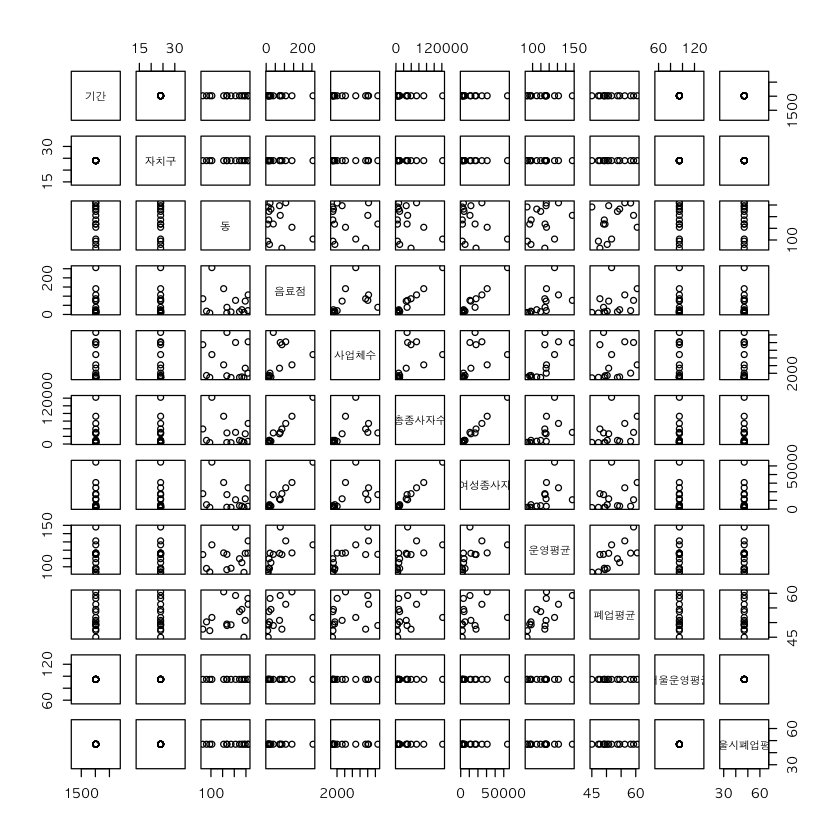

In [129]:
jj <- subset(seoul , seoul$자치구 == '중구' & seoul$기간 == 2015)
par(bg = 'white' , family = 'AppleGothic' )
plot(jj)